#Image Classification with Deep Learning

**Challenge: Identify what is shown in an image**

. . . for 10,000's of images

**Solution: Teach a machine**

Deep learning seems to be the state-of-the-art currently

For images, specifically convolutional neural nets

**Deep** means many layers, increasing the time to compute

**Large datasets** bring the best performance but further increase computation time

![Neural network diagram](Colored_neural_network.png)

Breakthrough has been performing computations on the GPU

Options in python . . .
* [Theano](http://deeplearning.net/software/theano/)
* [pylearn2](http://deeplearning.net/software/pylearn2/)
* [keras](http://keras.io)
* [blocks](https://github.com/mila-udem/blocks)
* [Lasagne](https://github.com/Lasagne/Lasagne)

Execution on the CPU is possible, but excruciatingly slow for anything but toy examples

**Toy example:** Handwritten digits

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

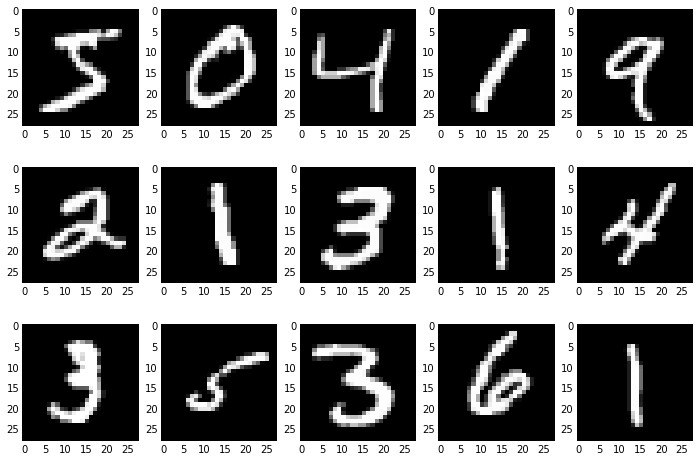

In [2]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], interpolation='nearest')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 512
nb_classes = 10
nb_epoch = 3

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
model = Sequential()

model.add(Convolution2D(8, 1, 3, 3, border_mode='full', activation='relu'))
model.add(Convolution2D(8, 8, 3, 3, activation='relu'))
model.add(MaxPooling2D(poolsize=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(8*196, 16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 0
60000/60000 [==============================] - 341s - loss: 1.2358 - acc: 0.5504 - val_loss: 0.4311 - val_acc: 0.8934
Epoch 1
60000/60000 [==============================] - 345s - loss: 0.7896 - acc: 0.7095 - val_loss: 0.3637 - val_acc: 0.9024
Epoch 2
60000/60000 [==============================] - 345s - loss: 0.6757 - acc: 0.7498 - val_loss: 0.1762 - val_acc: 0.9543


In [5]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.176152261331
Test accuracy: 0.9543


In [6]:
predictions = model.predict_classes(X_test)

10000/10000 [==============================] - 14s    


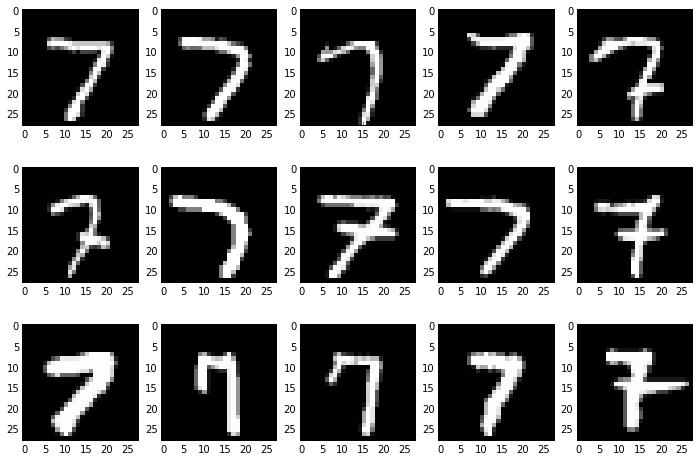

In [7]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[predictions == 7][i].reshape((28,28)), interpolation='nearest')
plt.show()

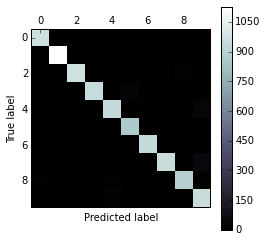

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
plt.bone()
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

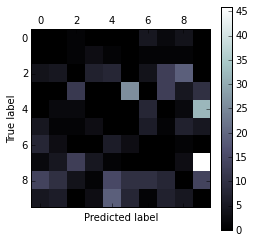

In [10]:
import numpy as np
np.fill_diagonal(cm, 0)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Questions

#Attribution
"Colored neural network" by Glosser.ca - Own work, Derivative of File:Artificial neural network.svg. Licensed under CC BY-SA 3.0 via Commons - https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg#/media/File:Colored_neural_network.svg